In [1]:
library(ggplot2)
library(dplyr)
library(readr)
library(DESeq2)
library(DiffBind)
library(tidyr)
library(wesanderson)
library(viridis)
library(gplots)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from 'package:dplyr':

    combine, intersect, setdiff, union

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    Filter,

In [2]:
setwd("/ddn1/vol1/staging/leuven/stg_00041/Irene/ATAC_analysis/Allelic_ATAC/X_to_A_allelic_ratio/")

In [3]:
df_allelic_full <- read.delim("df_allelic_full.txt")

In [4]:
head(df_allelic_full)

seqnames,start,end,width,strand,Day0_M,Day0_C,Day8_M,Day8_C,Day9_M,Day9_C,Day10_M,Day10_C,Day12_M,Day12_C,iPSCs_M,iPSCs_C
1,3046042,3046267,226,*,1,1,1,1,7,1,2,1,5,1,1,2
1,3046446,3046917,472,*,1,1,21,12,16,9,13,9,3,4,1,2
1,3215905,3216127,223,*,1,3,2,1,1,2,5,1,4,2,1,1
1,3250793,3251095,303,*,1,1,1,1,1,1,1,5,1,3,5,2
1,3251341,3251716,376,*,1,1,3,1,2,1,1,4,3,1,5,1
1,3285287,3285526,240,*,2,2,1,6,1,1,1,1,1,1,4,1


In [5]:
names(df_allelic_full)[names(df_allelic_full) == 'seqnames'] <- 'chr'

In [6]:
head(df_allelic_full)

chr,start,end,width,strand,Day0_M,Day0_C,Day8_M,Day8_C,Day9_M,Day9_C,Day10_M,Day10_C,Day12_M,Day12_C,iPSCs_M,iPSCs_C
1,3046042,3046267,226,*,1,1,1,1,7,1,2,1,5,1,1,2
1,3046446,3046917,472,*,1,1,21,12,16,9,13,9,3,4,1,2
1,3215905,3216127,223,*,1,3,2,1,1,2,5,1,4,2,1,1
1,3250793,3251095,303,*,1,1,1,1,1,1,1,5,1,3,5,2
1,3251341,3251716,376,*,1,1,3,1,2,1,1,4,3,1,5,1
1,3285287,3285526,240,*,2,2,1,6,1,1,1,1,1,1,4,1


In [7]:
df_allelic_full$names <- 1:nrow(df_allelic_full) 

In [8]:
head(df_allelic_full)

chr,start,end,width,strand,Day0_M,Day0_C,Day8_M,Day8_C,Day9_M,Day9_C,Day10_M,Day10_C,Day12_M,Day12_C,iPSCs_M,iPSCs_C,names
1,3046042,3046267,226,*,1,1,1,1,7,1,2,1,5,1,1,2,1
1,3046446,3046917,472,*,1,1,21,12,16,9,13,9,3,4,1,2,2
1,3215905,3216127,223,*,1,3,2,1,1,2,5,1,4,2,1,1,3
1,3250793,3251095,303,*,1,1,1,1,1,1,1,5,1,3,5,2,4
1,3251341,3251716,376,*,1,1,3,1,2,1,1,4,3,1,5,1,5
1,3285287,3285526,240,*,2,2,1,6,1,1,1,1,1,1,4,1,6


In [9]:
variables <- c("chr", "names", "Day0_M", "Day8_M", "Day9_M", "Day10_M", "Day12_M", "iPSCs_M", "Day0_C", "Day8_C", "Day9_C", "Day10_C", "Day12_C", "iPSCs_C")

In [10]:
df_allelic_full <- df_allelic_full[variables]

In [11]:
head(df_allelic_full)

chr,names,Day0_M,Day8_M,Day9_M,Day10_M,Day12_M,iPSCs_M,Day0_C,Day8_C,Day9_C,Day10_C,Day12_C,iPSCs_C
1,1,1,1,7,2,5,1,1,1,1,1,1,2
1,2,1,21,16,13,3,1,1,12,9,9,4,2
1,3,1,2,1,5,4,1,3,1,2,1,2,1
1,4,1,1,1,1,1,5,1,1,1,5,3,2
1,5,1,3,2,1,3,5,1,1,1,4,1,1
1,6,2,1,1,1,1,4,2,6,1,1,1,1


In [12]:
nrow(df_allelic_full)

[1] 408372

In [13]:
df_allelic_full_gathered <- gather(df_allelic_full, sample_allele, count, -chr, -names)

In [14]:
df_allelic_full_gathered <- separate(data = df_allelic_full_gathered, col = sample_allele, into = c("sample", "allele"), sep = "_")

In [15]:
head(df_allelic_full_gathered)

chr,names,sample,allele,count
1,1,Day0,M,1
1,2,Day0,M,1
1,3,Day0,M,1
1,4,Day0,M,1
1,5,Day0,M,1
1,6,Day0,M,2


In [16]:
df_allelic_full_gathered <- spread(df_allelic_full_gathered, allele, count)

In [17]:
head(df_allelic_full_gathered)

chr,names,sample,C,M
1,1,Day0,1,1
1,1,Day10,1,2
1,1,Day12,1,5
1,1,Day8,1,1
1,1,Day9,1,7
1,1,iPSCs,2,1


In [18]:
df_allelic_full_gathered$sample <- factor(df_allelic_full_gathered$sample, levels=c('Day0', 'Day8', 'Day9', 'Day10', 'Day12', 'iPSCs'))

In [19]:
df_allelic_full_gathered <- df_allelic_full_gathered %>% arrange(chr, names, sample)

In [20]:
head(df_allelic_full_gathered)

chr,names,sample,C,M
1,1,Day0,1,1
1,1,Day8,1,1
1,1,Day9,1,7
1,1,Day10,1,2
1,1,Day12,1,5
1,1,iPSCs,2,1


In [21]:
df_allelic_full_gathered$sumR <- df_allelic_full_gathered$C + df_allelic_full_gathered$M

In [22]:
head(df_allelic_full_gathered)

chr,names,sample,C,M,sumR
1,1,Day0,1,1,2
1,1,Day8,1,1,2
1,1,Day9,1,7,8
1,1,Day10,1,2,3
1,1,Day12,1,5,6
1,1,iPSCs,2,1,3


In [23]:
nrow(df_allelic_full_gathered)

[1] 2450232

In [24]:
count_samples <- df_allelic_full_gathered %>% group_by(sample) %>% summarise(total_reads = sum(sumR))
df_allelic_full_gathered <- merge(df_allelic_full_gathered, count_samples, by = "sample")

In [25]:
head(df_allelic_full_gathered)

sample,chr,names,C,M,sumR,total_reads
Day0,1,1,1,1,2,11348313
Day0,17,177148,1,1,2,11348313
Day0,10,44288,23,21,44,11348313
Day0,9,398582,1,6,7,11348313
Day0,4,265722,63,45,108,11348313
Day0,14,132862,5,1,6,11348313


In [26]:
df_allelic_full_gathered$mus_norm <- log1p((df_allelic_full_gathered$M/df_allelic_full_gathered$total_reads)*10000)
df_allelic_full_gathered$cast_norm <- log1p((df_allelic_full_gathered$C/df_allelic_full_gathered$total_reads)*10000)

In [27]:
head(df_allelic_full_gathered)

sample,chr,names,C,M,sumR,total_reads,mus_norm,cast_norm
Day0,1,1,1,1,2,11348313,0.0008808002,0.0008808002
Day0,17,177148,1,1,2,11348313,0.0008808002,0.0008808002
Day0,10,44288,23,21,44,11348313,0.0183358198,0.0200646808
Day0,9,398582,1,6,7,11348313,0.0052732017,0.0008808002
Day0,4,265722,63,45,108,11348313,0.0388874566,0.0540286662
Day0,14,132862,5,1,6,11348313,0.0008808002,0.0043962635


Filter for all autosomes and the X chromosome plus equal to or more than 10 reads between cast and mus alleles.

In [28]:
allchr_10reads <- df_allelic_full_gathered[ which( df_allelic_full_gathered$chr!= "Y" & df_allelic_full_gathered$chr!= "MT" & df_allelic_full_gathered$sumR >= 10),]

In [29]:
head(allchr_10reads)

,sample,chr,names,C,M,sumR,total_reads,mus_norm,cast_norm
3,Day0,10,44288,23,21,44,11348313,0.018335820,0.020064681
5,Day0,4,265722,63,45,108,11348313,0.038887457,0.054028666
10,Day0,9,398583,2,8,10,11348313,0.007024774,0.001760825
11,Day0,4,265723,39,24,63,11348313,0.020927992,0.033789009
16,Day0,9,398584,61,67,128,11348313,0.057362471,0.052357587
22,Day0,9,398585,74,36,110,11348313,0.031230004,0.063170020


In [30]:
nrow(allchr_10reads)

[1] 1145497

In [31]:
columns <- c("chr", "cast_norm", "sample")

In [32]:
allchr_cast <- allchr_10reads[columns]

In [33]:
head(allchr_cast)

,chr,cast_norm,sample
3,10,0.020064681,Day0
5,4,0.054028666,Day0
10,9,0.001760825,Day0
11,4,0.033789009,Day0
16,9,0.052357587,Day0
22,9,0.063170020,Day0


In [34]:
#X_ordered <- X[, c(3, 2)]

In [35]:
#head(X_ordered)

In [36]:
allchr_cast$sample <- as.character(allchr_cast$sample)

In [37]:
day0 <- subset(allchr_cast, sample == 'Day0')
day8 <- subset(allchr_cast, sample == 'Day8')
day9 <- subset(allchr_cast, sample == 'Day9')
day10 <- subset(allchr_cast, sample == 'Day10')
day12 <- subset(allchr_cast, sample == 'Day12')
iPSCs <- subset(allchr_cast, sample == 'iPSCs')

In [38]:
day0$chr <- factor(day0$chr, levels=c('X', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19'))
day8$chr <- factor(day8$chr, levels=c('X', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19'))
day9$chr <- factor(day9$chr, levels=c('X', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19'))
day10$chr <- factor(day10$chr, levels=c('X', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19'))
day12$chr <- factor(day12$chr, levels=c('X', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19'))
iPSCs$chr <- factor(iPSCs$chr, levels=c('X', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19'))

In [39]:
head(day0)

,chr,cast_norm,sample
3,10,0.020064681,Day0
5,4,0.054028666,Day0
10,9,0.001760825,Day0
11,4,0.033789009,Day0
16,9,0.052357587,Day0
22,9,0.063170020,Day0


In [40]:
median_iPSCs <- iPSCs %>%
  group_by(chr) %>%
  summarize(median=median(cast_norm))

In [41]:
median_iPSCs

chr,median
X,0.01248889
1,0.01248889
2,0.01248889
3,0.01248889
4,0.01361655
5,0.01361655
6,0.01248889
7,0.01474293
8,0.01361655
9,0.01361655


In [42]:
median_day0 <- day0 %>%
  group_by(chr) %>%
  summarize(median=median(cast_norm))

In [43]:
median_day0

chr,median
X,0.01747027
1,0.01313123
2,0.01313123
3,0.01400055
4,0.01313123
5,0.01313123
6,0.01400055
7,0.01400055
8,0.01313123
9,0.01400055


In [44]:
res <- pairwise.wilcox.test(iPSCs$cast_norm, iPSCs$chr, p.adjust.method = "bonferroni")

In [46]:
res


	Pairwise comparisons using Wilcoxon rank sum test 

data:  iPSCs$cast_norm and iPSCs$chr 

   X       1       2       3       4       5       6       7       8      
1  1.00000 -       -       -       -       -       -       -       -      
2  1.00000 1.00000 -       -       -       -       -       -       -      
3  1.00000 1.00000 1.00000 -       -       -       -       -       -      
4  0.00051 4.5e-12 3.2e-10 5.4e-12 -       -       -       -       -      
5  1.00000 0.00925 0.14255 0.00299 0.03993 -       -       -       -      
6  1.00000 1.00000 1.00000 1.00000 1.7e-06 1.00000 -       -       -      
7  4.3e-07 < 2e-16 2.9e-16 < 2e-16 1.00000 5.7e-06 2.5e-11 -       -      
8  1.00000 1.00000 1.00000 1.00000 8.9e-05 1.00000 1.00000 3.8e-09 -      
9  0.00057 3.6e-11 2.1e-09 2.8e-11 1.00000 0.05725 4.3e-06 1.00000 0.00014
10 0.00463 0.00352 6.0e-05 0.12377 < 2e-16 1.0e-13 6.0e-06 < 2e-16 2.2e-07
11 0.37281 4.8e-06 0.00015 2.2e-06 1.00000 1.00000 0.03236 0.01053 0.41526
12 1.00

In [45]:
res$p.value

X,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
1.000000e+00,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1.000000e+00,1.000000e+00,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1.000000e+00,1.000000e+00,1.000000e+00,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5.093214e-04,4.521216e-12,3.194821e-10,5.368775e-12,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1.000000e+00,9.249253e-03,1.425532e-01,2.991773e-03,3.992863e-02,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.687347e-06,1.000000e+00,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4.283324e-07,3.430823e-18,2.948431e-16,1.158778e-17,1.000000e+00,5.682451e-06,2.540644e-11,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.861273e-05,1.000000e+00,1.000000e+00,3.788343e-09,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5.666173e-04,3.567949e-11,2.103258e-09,2.837455e-11,1.000000e+00,5.725034e-02,4.273859e-06,1.000000e+00,1.438157e-04,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4.628968e-03,3.523446e-03,6.016712e-05,1.237653e-01,1.119109e-27,1.023129e-13,6.011210e-06,2.013537e-35,2.203352e-07,8.523482e-26,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [76]:
options(repr.plot.width=10, repr.plot.height=3)
day0_allchr_accessibility_plot <- ggplot(day0, aes(x=chr, y=cast_norm, fill=sample)) + 
  
geom_violin(scale = "width", alpha = 0.7, show.legend=FALSE, outlier.shape = FALSE) +
scale_fill_brewer(palette="Pastel1")+
geom_boxplot(width=0.2, fill="white", alpha = 0.5, outlier.shape = FALSE) +

  scale_colour_brewer("Colors in Paired", palette="Pastel1")+
  #geom_jitter(width = 1, alpha = 0.5, show.legend=FALSE, aes(color = sample)) +

 
 theme(plot.title = element_text(size=6))+

    xlab("chromosome") + 
    ylab("accessibility in MEFs")+
    coord_cartesian(ylim = c(0,0.075))+
    theme(axis.text.x  = element_text(angle=0, vjust=0.5, size=8, color = "black"))+
 theme(axis.text.y  = element_text(color = "black"))+
    theme(legend.title=element_blank())+
    theme(axis.line = element_line(colour = "black"),
    panel.grid.major = element_line(colour = "grey82"),
   
    panel.border = element_blank(),
    panel.background = element_blank())

Warning message:
"Ignoring unknown parameters: outlier.shape"

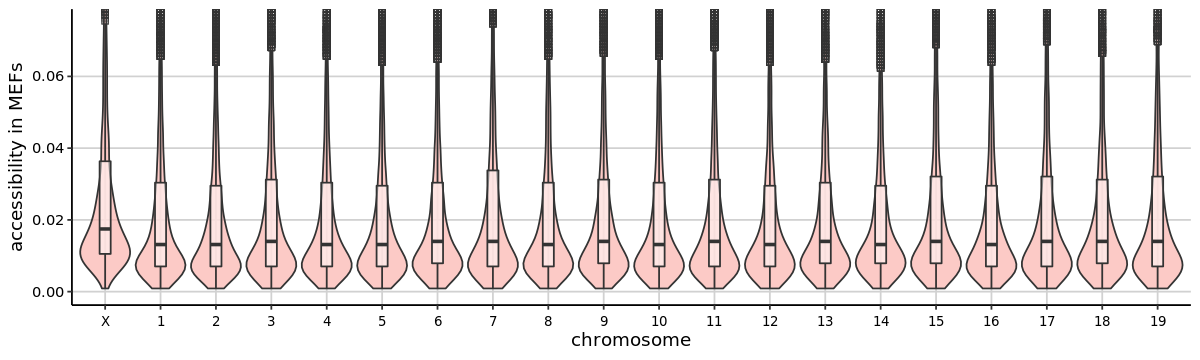

In [77]:
day0_allchr_accessibility_plot

In [78]:
setwd("/ddn1/vol1/staging/leuven/stg_00041/Irene/ATAC_analysis/Allelic_ATAC/hyperaccessibility/")
ggsave("Xa_Auto_accessibility_MEFs.pdf", width = 10, height = 3)

In [268]:

options(repr.plot.width=5, repr.plot.height=2.5)
iPSCs_new <- ggplot(iPSCs, aes(x=cast_norm, color=chr)) +
  geom_density()+


geom_vline(data=median_iPSCs, aes(xintercept=median, colour=chr), linetype="dashed", size= 1) +


 theme(plot.title = element_text(size=6))+
    xlab("normalized accessibility") + 
    ylab("Regions (density)")+
   # coord_cartesian(ylim = c(0,4))+
    coord_cartesian(xlim = c(0,0.1))+
scale_x_continuous(expand = c(0, 0)) + 
scale_y_continuous(expand = c(0, 0))+
    theme(axis.text.x  = element_text(angle=0, vjust=0.5, size=8, color = "black"))+
 theme(axis.text.y  = element_text(color = "black"))+
theme_classic()+   
theme(legend.title=element_blank())

 

In [79]:
options(repr.plot.width=10, repr.plot.height=3)
iPSCs_allchr_accessibility_plot <- ggplot(iPSCs, aes(x=chr, y=cast_norm, fill=sample)) + 
  
geom_violin(scale = "width", alpha = 0.7, show.legend=FALSE, outlier.shape = FALSE) +
scale_fill_brewer(palette="Pastel1")+
geom_boxplot(width=0.2, fill="white", alpha = 0.5, outlier.shape = FALSE) +

  scale_colour_brewer("Colors in Paired", palette="Pastel1")+
  #geom_jitter(width = 1, alpha = 0.5, show.legend=FALSE, aes(color = sample)) +

 
 theme(plot.title = element_text(size=6))+

    xlab("chromosome") + 
    ylab("accessibility in iPSCs")+
    coord_cartesian(ylim = c(0,0.075))+
    theme(axis.text.x  = element_text(angle=0, vjust=0.5, size=8, color = "black"))+
 theme(axis.text.y  = element_text(color = "black"))+
    theme(legend.title=element_blank())+
    theme(axis.line = element_line(colour = "black"),
    panel.grid.major = element_line(colour = "grey82"),
   
    panel.border = element_blank(),
    panel.background = element_blank())

Warning message:
"Ignoring unknown parameters: outlier.shape"

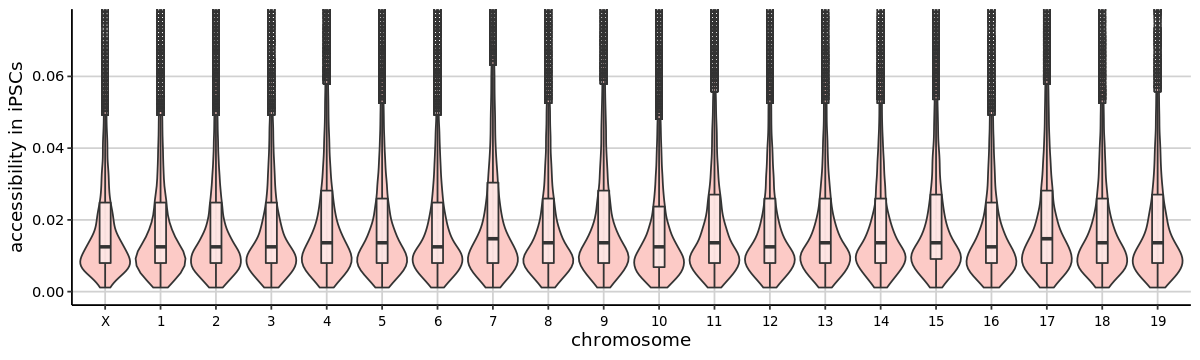

In [80]:
iPSCs_allchr_accessibility_plot 

In [81]:
setwd("/ddn1/vol1/staging/leuven/stg_00041/Irene/ATAC_analysis/Allelic_ATAC/hyperaccessibility/")
ggsave("Xa_Auto_accessibility_iPSCs.pdf", width = 10, height = 3)